# Systems and Transformations

In [1]:
# HIDDEN
from IPython.display import HTML
HTML('''<script>
var code_show_err = false; 
var code_toggle_err = function() {
 var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
 var stderr = Array.from(stderrNodes)
 if (code_show_err){
     stderr.forEach(ele => ele.style.display = 'block');
 } else {
     stderr.forEach(ele => ele.style.display = 'none');
 }
 code_show_err = !code_show_err
} 
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

import warnings
warnings.filterwarnings('ignore')

import sympy as sp
import numpy as np

from sympy.abc import t, x, y
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams['text.usetex'] = True
%matplotlib inline 
         
def mpl_axes_plot(axes, expr, xrange, zero_is_none=False, **kwargs):
    x, start, stop = xrange
    func = sp.lambdify(x, expr)
    x = np.linspace(start, stop, 10000)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid(False)
    axes.margins(0.02, 0.02)
    if zero_is_none:
        y[y==0] = np.nan
    axes.plot(x, y, **kwargs)
    axes.plot(x, np.zeros_like(x), color='k', alpha=0.5)
    return axes
    
def mpl_axes_stem(axes, expr, xrange, zero_is_none=False, **kwargs):
    x, start, stop, step = xrange
    func = sp.lambdify(x, expr, ['numpy', 'sympy'])
    x = np.arange(start, stop, step)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid(False)
    axes.margins(0.02, 0.02)
    axes.plot(x, np.zeros_like(x), color='k', alpha=0.5)
    if zero_is_none:
        y[y==0] = np.nan
    axes.stem(x, y, basefmt=" ", use_line_collection=True, **kwargs)
    return axes
    
def mpl_axes_step(axes, expr, xrange, **kwargs):
    x, start, stop, step = xrange
    func = sp.lambdify(x, expr)
    x = np.arange(start, stop, step)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid(False)
    axes.margins(0.02, 0.02)
    axes.plot(x, np.zeros_like(x), color='k', alpha=0.5)
    return axes.step(x, y, **kwargs)

## What are Systems?

- Systems are the mappings from input signals to output signals. 
- Systems are mathematical models that transform the input signals to the output signals. 
- Systems are mathematical models that transform single input signal to single output signal. 

## Types of Systems

- Continuous-Time (CT) Systems.
- Discrete-Time (CT) Systems.
- Deterministic Systems.
- Probabilistic Systems.

## Affine (Shape-preserved) Systems

In [2]:
# HIDE/SHOW
f = sp.Piecewise(
    (0, t<-5),                   
    (10, (t>=-5)&(t<0)), 
    (20, (t>=0)&(t<5)), 
    (40-4*t, (t>=5)&(t<10)), 
    (0, t>=10)
)

### Shifting

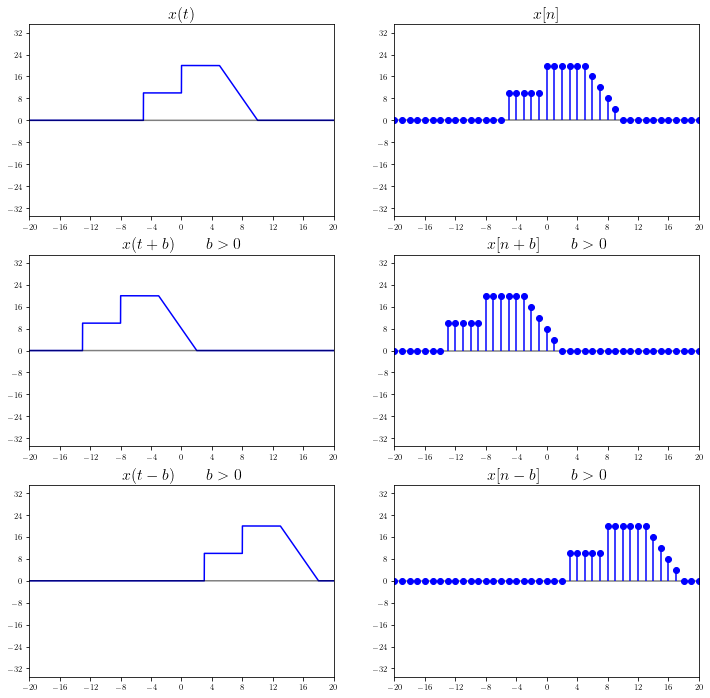

In [3]:
# HIDE/SHOW
fig, ax = plt.subplots(
    3, 2, 
    figsize=(12, 12), 
    # tight_layout=True,
)
    
mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
ax[0][0].set_xlim(-20, 20, 0.2)
ax[0][0].set_ylim(-35, 35, 0.2)
ax[0][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[0][1], f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 0.2)
ax[0][1].set_ylim(-35, 35, 0.2)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_plot(ax[1][0], f.subs(t, t+8), (t, -20, 20), color='b')
ax[1][0].set_xlim(-20, 20, 0.2)
ax[1][0].set_ylim(-35, 35, 0.2)
ax[1][0].set_title(r'$x(t+b) \qquad b>0$', fontsize=16)

mpl_axes_stem(ax[1][1], f.subs(t, t+8), (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-20, 20, 0.2)
ax[1][1].set_ylim(-35, 35, 0.2)
ax[1][1].set_title(r'$x[n+b] \qquad b>0$', fontsize=16)

mpl_axes_plot(ax[2][0], f.subs(t, t-8), (t, -20, 20), color='b')
ax[2][0].set_xlim(-20, 20, 0.2)
ax[2][0].set_ylim(-35, 35, 0.2)
ax[2][0].set_title(r'$x(t-b) \qquad b>0$', fontsize=16)


mpl_axes_stem(ax[2][1], f.subs(t, t-8), (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[2][1].set_xlim(-20, 20, 0.2)
ax[2][1].set_ylim(-35, 35, 0.2)
ax[2][1].set_title(r'$x[n-b] \qquad b>0$', fontsize=16)

plt.show()

### Scaling

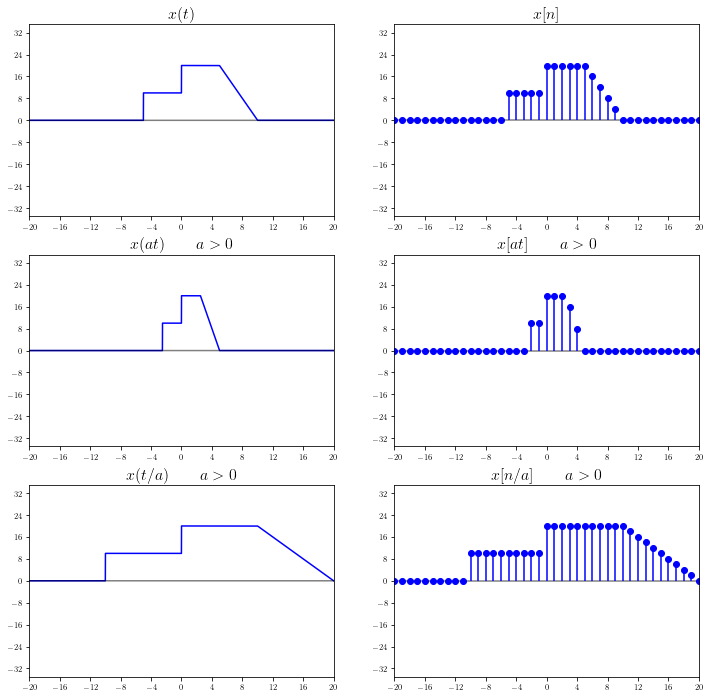

In [6]:
# HIDE/SHOW
fig, ax = plt.subplots(
    3, 2, 
    figsize=(12, 12), 
    # tight_layout=True,
)
    
mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
ax[0][0].set_xlim(-20, 20, 0.2)
ax[0][0].set_ylim(-35, 35, 0.2)
ax[0][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[0][1], f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 0.2)
ax[0][1].set_ylim(-35, 35, 0.2)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_plot(ax[1][0], f.subs(t, 2*t), (t, -20, 20), color='b')
ax[1][0].set_xlim(-20, 20, 0.2)
ax[1][0].set_ylim(-35, 35, 0.2)
ax[1][0].set_title(r'$x(at) \qquad a>0$', fontsize=16)

mpl_axes_stem(ax[1][1], f.subs(t, 2*t), (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-20, 20, 0.2)
ax[1][1].set_ylim(-35, 35, 0.2)
ax[1][1].set_title(r'$x[at] \qquad a>0$', fontsize=16)

mpl_axes_plot(ax[2][0], f.subs(t, t/2), (t, -20, 20), color='b')
ax[2][0].set_xlim(-20, 20, 0.2)
ax[2][0].set_ylim(-35, 35, 0.2)
ax[2][0].set_title(r'$x(t/a) \qquad a>0$', fontsize=16)


mpl_axes_stem(ax[2][1], f.subs(t, t/2), (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[2][1].set_xlim(-20, 20, 0.2)
ax[2][1].set_ylim(-35, 35, 0.2)
ax[2][1].set_title(r'$x[n/a] \qquad a>0$', fontsize=16)

plt.show()